In [1]:
pip install nibabel numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [22]:
import nibabel as nib
import numpy as np

In [3]:
path = '/Users/lavanya/Brain-Spy/Week 2/Sample Data/sub-62038_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii'

In [12]:
img = nib.load(path)
img.shape

(256, 362, 384)

In [13]:
type(img)

nibabel.nifti1.Nifti1Image

In [17]:
img_data = img.get_fdata()
img_data.shape

(256, 362, 384)

In [16]:
type(img_data)

numpy.ndarray

In [15]:
affine = img.affine
header = img.header
    

In [18]:
img.affine

array([[ 6.29074156e-01, -1.33072212e-02, -3.11387163e-02,
        -7.36054077e+01],
       [ 1.63442213e-02,  6.21981978e-01,  5.91654330e-02,
        -1.00073349e+02],
       [ 2.99664345e-02, -5.98863661e-02,  6.21413589e-01,
        -1.19990189e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [19]:
rotation_scaling = affine[:3, :3]

In [26]:
voxel_sizes = np.sqrt(np.sum(rotation_scaling **2, axis=0))
print(f"Voxel sizes from affine: {voxel_sizes_affine} mm")
print(f"X spacing: {voxel_sizes[0]:.4f} mm")
print(f"Y spacing: {voxel_sizes[1]:.4f} mm")
print(f"Z spacing: {voxel_sizes[2]:.4f} mm")
print()

Voxel sizes from affine: [0.62999954 0.62500003 0.62500001] mm
X spacing: 0.6300 mm
Y spacing: 0.6250 mm
Z spacing: 0.6250 mm



In [27]:
## DICOM File

In [31]:
pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 11.0 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [43]:
from glob import glob
import matplotlib.pylab as plt
import pydicom as dicom
import os

In [44]:
dicom_dir = '/Users/lavanya/Downloads/sub-62038-ses-1-acq-t1csmp2rages'
dicom_files = [os.path.join(dicom_dir, f) for f in os.listdir(dicom_dir)
               if os.path.isfile(os.path.join(dicom_dir, f))]

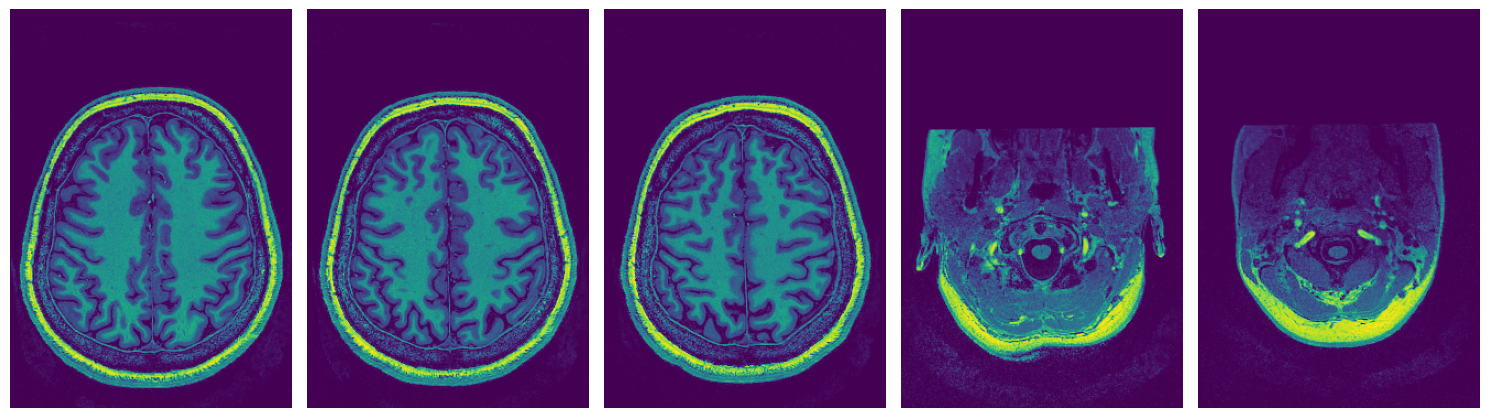

In [54]:
n = min(len(dicom_files), 5)
fig, axes = plt.subplots(1, n, figsize=(15, 5))

for idx, ax in enumerate(axes.reshape(-1)):
    ds = dicom.dcmread(dicom_files[idx])
    ax.imshow(ds.pixel_array)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [61]:
dcm_path = '/Users/lavanya/Downloads/sub-62038-ses-1-acq-t1csmp2rages/image.0384.dcm'
ds = dicom.dcmread(dcm_path)

In [64]:
print("Patient Name:", ds.get("PatientName", "N/A"))
print("Study Date:", ds.get("StudyDate", "N/A"))
print("Modality:", ds.get("Modality", "N/A"))
print("Pixel Spacing:", ds.get("PixelSpacing", "N/A"))
print("Slice Thickness:", ds.get("SliceThickness", "N/A"))
print("Image Position Patient:", ds.get("ImagePositionPatient", "N/A"))
print("Image Orientation Patient:", ds.get("ImageOrientationPatient", "N/A"))
print("Rows x Columns:", f"{ds.Rows} x {ds.Columns}")

Patient Name: NIFTI
Study Date: 
Modality: MR
Pixel Spacing: [.625, .629999995231628]
Slice Thickness: 0.625
Image Position Patient: [-70.07858446863, -151.29027344556, 104.033680205211]
Image Orientation Patient: [.9985311428439, .02594322755014, -.04756580405224, -.02129155287149, .995171113927686, .095818180843975]
Rows x Columns: 362 x 256


In [65]:
dicom_files.sort()

In [68]:
slices = [dicom.dcmread(f).pixel_array for f in dicom_files]
volume = np.stack(slices, axis=0)

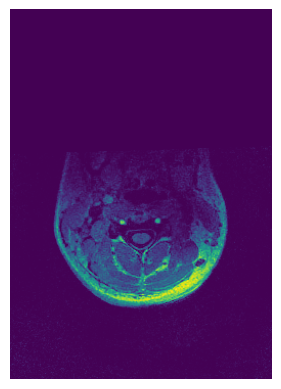

In [73]:
plt.imshow(volume[27])  
plt.axis('off')
plt.show()

In [75]:
axial_idx = volume.shape[0] // 2
coronal_idx = volume.shape[1] // 2
sagittal_idx = volume.shape[2] // 2

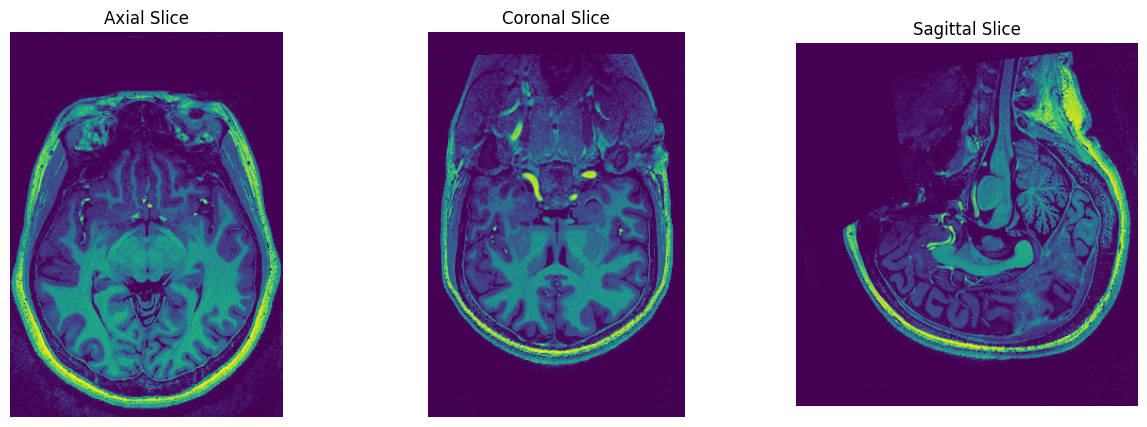

In [82]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(volume[axial_idx, :, :])
axes[0].set_title(f'Axial Slice')
axes[0].axis('off')

axes[1].imshow(volume[:, coronal_idx, :])
axes[1].set_title(f'Coronal Slice')
axes[1].axis('off')

axes[2].imshow(volume[:, :, sagittal_idx])
axes[2].set_title(f'Sagittal Slice')
axes[2].axis('off')

plt.show()